# Visualizing Conv filters using ActivationMaximization

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/keisen/tf-keras-vis/blob/master/examples/visualize_conv_filters.ipynb)
[![Right click and save](https://img.shields.io/badge/Notebook-Open_In_Github-orange.svg)](https://github.com/keisen/tf-keras-vis/blob/master/docs/examples/visualize_conv_filters.ipynb)

Preparation
-----------

### Load libraries

In [1]:
%load_ext autoreload
%autoreload 2
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

%matplotlib inline
from packaging.version import parse as version

from tf_keras_vis.utils import num_of_gpus

if version(tf.version.VERSION) < version('2.16.0'):
    import tensorflow.keras as keras
else:
    import keras

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

2025-03-12 12:14:30.711256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741749270.734787    1580 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741749270.738998    1580 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 12:14:30.756316: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow recognized 0 GPUs


2025-03-12 12:14:34.860354: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Load keras.Model

In this notebook, we use VGG16 model, however if you want to use other keras.Model, you can do so by modifying the section below.

In [2]:
model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Implement functions required to use ActivationMaximization
----------------------------------------------------------

### Model modifier

You **MUST** define a model modifier to replace the model output to target layer's output that has filters you want to visualize, and , in addion, replace the function of it to a linear activation function.

Although we create and use `ExtractIntermediateLayer` and `ReplaceToLinear` instance, we can also use the model modifier function defined by ourselves.

In [3]:
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear

layer_name = 'block5_conv3'  # The target layer that is the last layer of VGG16.

# This instance constructs new model whose output is replaced to `block5_conv3` layer's output.
extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)
# This instance modify the model's last activation function to linear one.
replace2linear = ReplaceToLinear()


# Instead of using ExtractIntermediateLayer and ReplaceToLinear instance,
# you can also define the function from scratch as follows:
def model_modifier_function(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    target_layer.activation = keras.activations.linear
    new_model = keras.Model(inputs=current_model.inputs, outputs=target_layer.output)
    return new_model

### Score function

And then, you **MUST** create `Score` instance or define `score function` that returns target scores. Here, they return the value of 3rd filter in `block5_conv3` layer. 

In [4]:
from tf_keras_vis.utils.scores import CategoricalScore

filter_number = 3
score = CategoricalScore(filter_number)


# Instead of using CategoricalScore object above,
# you can also define the function from scratch as follows:
def score_function(output):
    return output[..., filter_number]

Visualizeing a conv filter
--------------------------

### Create ActivationMaximization Instnace

When `clone` argument is True(default), the `model` will be cloned, so the `model` instance will be NOT modified, however the process may take a while.

Here, because the ExtractIntermediateLayer instance will construct new model, setting `False`.

In [5]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(
    model,
    # Please note that `extract_intermediate_layer` has to come before `replace2linear`.
    model_modifier=[extract_intermediate_layer, replace2linear],
    clone=False)

### Visualize
ActivationMaximization will maximize the value computed by the score function. Here, we will visualize the 63rd convolutional filter.

200/200 ━━━━━━━━━━━━━━━━━━━━ 131s 655ms/step - Score: 383.8325 - TotalVariation2D: 10.1696 - Norm: 38.4541


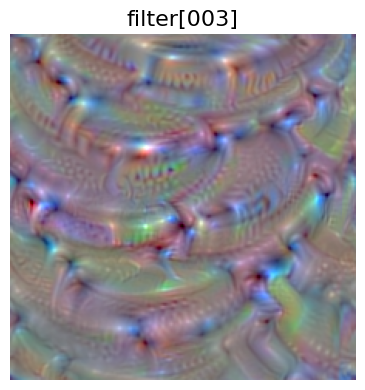

CPU times: user 10min 9s, sys: 39.7 s, total: 10min 48s
Wall time: 2min 11s


In [6]:
%%time

from tf_keras_vis.activation_maximization.callbacks import Progress

# Generate maximized activation
activations = activation_maximization(score, callbacks=[Progress()])
activations = activations.astype(np.uint8)

# Render
f, ax = plt.subplots(figsize=(4, 4))
ax.imshow(activations[0])
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

Visualizing Conv filters
------------------------

Then, let's visualize multiple convolutional filters!


### Modify Score function

Because change the target you want to visualize, you MUST create `Score` instance or define `score function` again. Here, our socre function returns the values corresponding to 63rd, 132nd and 320th filters of the layer.

In [7]:
from tf_keras_vis.utils.scores import CategoricalScore

filter_numbers = [63, 132, 320]
scores = CategoricalScore(filter_numbers)

### Create Seed-Input values

And then, you MUST create `seed_input` value. In default, when visualizing a specific filter, tf-keras-vis automatically generates `seed_input` to visualize a image. When visualizing multiple images, you MUST manually create `seed_input`.

In [8]:
# Define seed inputs whose shape is (samples, height, width, channels).

seed_input = tf.random.uniform((3, 224, 224, 3), 0, 255)

### Visualize

200/200 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - Score: 403.1880 - TotalVariation2D: 10.4963 - Norm: 38.4931


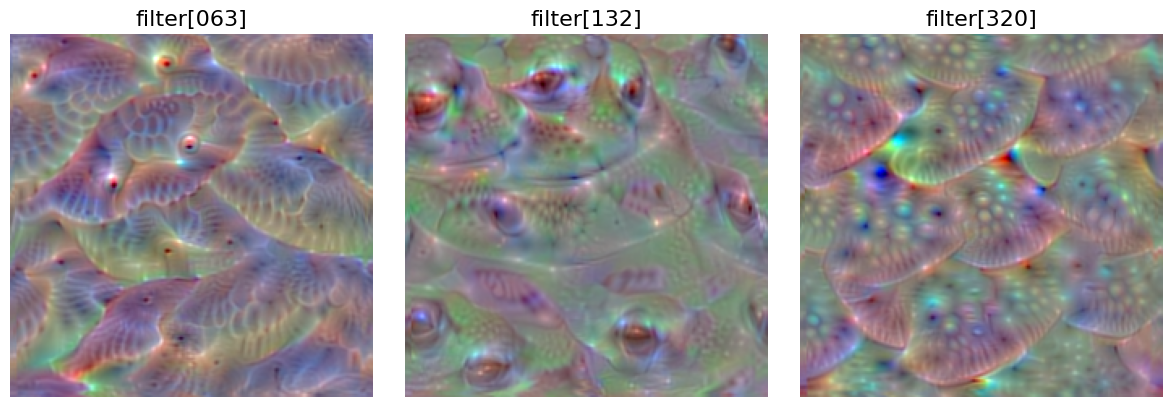

CPU times: user 33min 48s, sys: 1min 30s, total: 35min 18s
Wall time: 5min 58s


In [9]:
%%time

from tf_keras_vis.activation_maximization.callbacks import Progress

# Generate maximized activation
activations = activation_maximization(scores, seed_input=seed_input, callbacks=[Progress()])
activations = activations.astype(np.uint8)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, filter_number in enumerate(filter_numbers):
    ax[i].set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()